In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Diabetes.csv")

In [3]:
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [8]:
X=df[[ 'Glucose', 'BloodPressure', 'Insulin',
        'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [12]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error:{mae}')


Mean Squared Error: 0.17071853442457086
R-squared: 0.22139216107439963
Mean Absolute Error:0.33949718583367566


In [13]:
print("Weights:", model.coef_)

Weights: [ 6.35056341e-03 -1.16295431e-03 -1.26221472e-04  1.90922001e-01
  5.75983986e-03]


In [14]:
print("Intercept", model.intercept_)

Intercept -0.6079952343197348


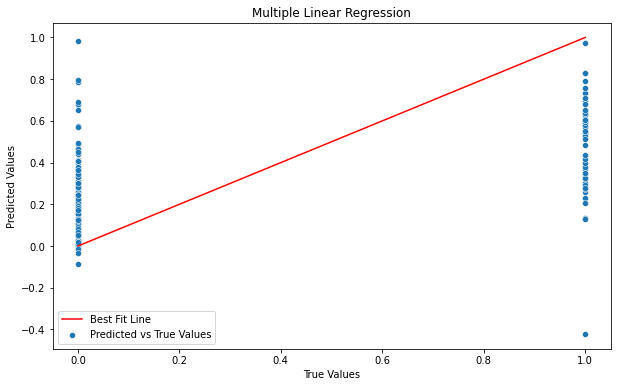

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Predicted vs True Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Best Fit Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()


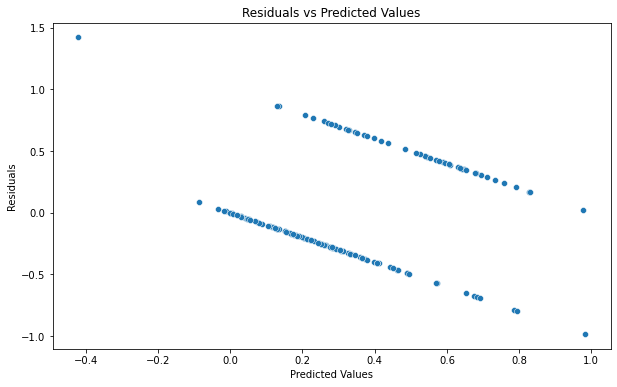

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


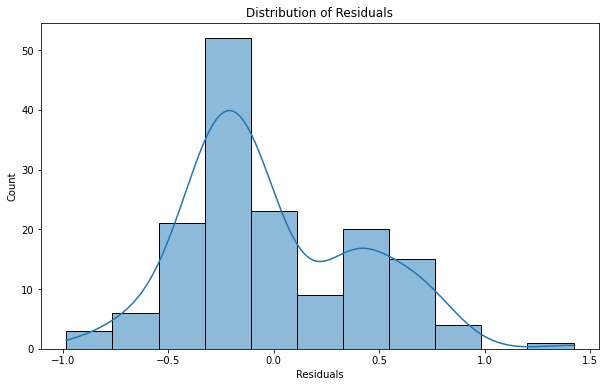

In [17]:
# 3. Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


C:\Users\suyash\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 720x432 with 0 Axes>

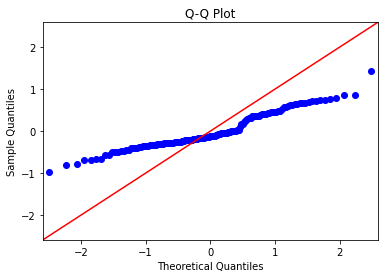

In [18]:
# 4. Q-Q Plot
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

C:\Users\suyash\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


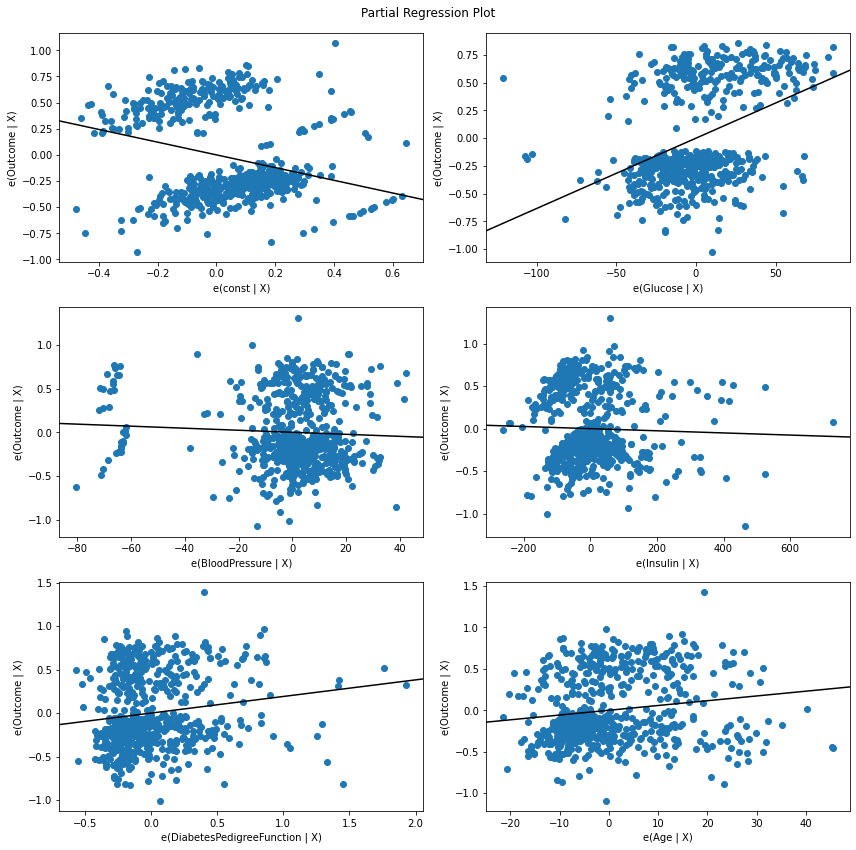

In [21]:
# 5. Partial Regression Plots
fig = plt.figure(figsize=(12, 12))
sm.graphics.plot_partregress_grid(sm.OLS(y_train, sm.add_constant(X_train)).fit(), fig=fig)
plt.show()
